In [5]:
# 필요한 라이브러리 호출
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# 한글폰트 출력 가능 코드
from matplotlib import rc
rc('font', family='AppleGothic') # Mac Os
#rc('font', family='NanumGothic') # Windows Os
plt.rcParams['axes.unicode_minus'] = False

path = '../dataset/'

# 1. Simple data 형성

In [3]:
# 데이터 랜덤하게 형성 (seed 부여)
np.random.seed(1)

# 12개월 동안 발생한 특정 지역 A의 범죄 건수라고 가정 (중심도 이해와 동일)
X = np.random.randint(1,20,12)
print(X)

[ 6 12 13  9 10 12  6 16  1 17  2 13]


## 1-1. 데이터 시각화

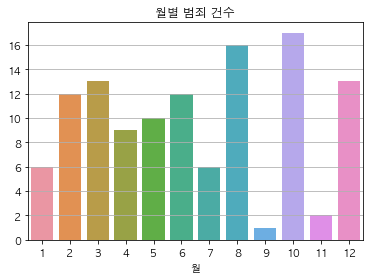

In [6]:
# 데이터 보기 (시각화로 각 원소별 개수를 출력)

sns.barplot(x= list(map(lambda x: x , range(1,13))), y=X)
plt.title('월별 범죄 건수')
plt.xlabel('월')
plt.grid(axis='y')
plt.show()

## 1-2. 분산도 이해

### A. 범위

In [7]:
# 오름차순 정렬
tmp_data = sorted(X)
print(f'오름차순 정렬한 값 : {tmp_data}')

# 최솟값과 최댓값 출력
print(f'최소값 : {tmp_data[0]}')
print(f'최댓값 : {tmp_data[-1]}')

오름차순 정렬한 값 : [1, 2, 6, 6, 9, 10, 12, 12, 13, 13, 16, 17]
최소값 : 1
최댓값 : 17


In [9]:
# max, min 매서드 활용
print(f'특정 지역 A의 범죄 건수 데이터 : {X.tolist()}')

print(f'최솟값 : {min(X)}')
print(f'최댓값 : {max(X)}')

# 따라서 범위는 최댓값 - 최솟값으로 출력할 수 있음.
print(f'특정 지역 A의 범죄 건수 데이터의 범위는 최소 {min(X)}에서 최대 {max(X)}로 {round(max(X) - min(X),2)}의 범위를 가지고 있습니다.')


특정 지역 A의 범죄 건수 데이터 : [6, 12, 13, 9, 10, 12, 6, 16, 1, 17, 2, 13]
최솟값 : 1
최댓값 : 17
특정 지역 A의 범죄 건수 데이터의 범위는 최소 1에서 최대 17로 16의 범위를 가지고 있습니다.


### B. 분산

In [13]:
n = len(X)
m = X.mean()

# 제곱을 해주는 매서드 pow를 활용하여 편차의 제곱 도출
# 편차 = 변량 - 평균
print(pow(X-m, 2))
resid = pow(X-m, 2)

# 제곱합을 한 후, 변량의 개수로 나눠주면 분산 도출
print(f'편차의 제곱합의 평균, 즉 분산은 {sum(resid)/n}입니다.')

[1.40625e+01 5.06250e+00 1.05625e+01 5.62500e-01 6.25000e-02 5.06250e+00
 1.40625e+01 3.90625e+01 7.65625e+01 5.25625e+01 6.00625e+01 1.05625e+01]
편차의 제곱합의 평균, 즉 분산은 24.020833333333332입니다.


In [15]:
# numpy를 이용한 분산값 도출
np.var(X)

24.020833333333332

### C. 표준편차

In [16]:
# 표준편차는 분산의 제곱근입니다.
print(pow(np.var(X),1/2))

# numpy의 std 매서드를 활용한 표준편차 도출
print(np.std((X)))

4.90110531751087
4.90110531751087


### D. 왜도

In [17]:
# 변수 설정
n = len(X)
m = X.mean()
std = np.std(X)

# 편차/표쥰편차 값에 3제곱 시행 
tmp_result = pow((X - m)/std, 3)
print(f'편차/표쥰편차의 3제곱 : {tmp_result.tolist()}')

# 3제곱 한 값을 더하고 데이터 개수만큼 나누면 왜도 도출
result = sum(tmp_result)/n
print(f'왜도 : {result}')

편차/표쥰편차의 3제곱 : [-0.44793159673025457, 0.09675322489373499, 0.29158687941225747, -0.003583452773842037, 0.00013272047310526058, 0.09675322489373499, -0.44793159673025457, 2.0737573922696972, -5.690390284388049, 3.236919618564201, -3.9538756142788194, 0.29158687941225747]
왜도 : -0.3713518837485193


### E. 첨도

In [18]:
# 변수 설정
n = len(X)
m = X.mean()
std = np.std(X)

# 편차/표준편차의 4제곱 시행
tmp_result = pow(((X - m) / std), 4)
print(f'편차/표쥰편차의 4제곱 : {tmp_result.tolist()}')

# 4제곱 한 값을 더하고 데이터 개수만큼 나누고 -3을 하면 첨도 도출
result = sum(tmp_result)/n - 3
print(f'첨도 : {result}')

편차/표쥰편차의 4제곱 : [0.34272748266334907, 0.04441748175317004, 0.19335584458958832, 0.0005483639722613585, 6.7699255834735595e-06, 0.04441748175317004, 0.34272748266334907, 2.6445021810443605, 10.159119578700013, 4.788239736604764, 6.252168444775088, 0.19335584458958832]
첨도 : -0.9162011089138096


In [19]:
# 라이브러리 import로 구한 kurtosis
from scipy.stats import kurtosis

kurtosis(X)

-0.9162011089138105

# 데이터 불러오기

In [20]:
# CSV 파일로 불러오기
data = pd.read_csv(f'{path}경찰청 강원도경찰청_5대범죄 발생 및 검거 현황_20191231.csv')
data

,년도,발생,검거,검거율,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,2019,13859,11597,83.7,22,21,25,26,689,650,4675,3155,8448,7745
1,2018,14094,11980,85.0,25,24,16,16,699,665,4300,3048,9054,8227
2,2017,16187,13540,83.6,32,32,27,26,627,591,5248,3628,10253,9263
3,2016,16678,14037,84.2,28,29,28,29,603,570,5166,3568,10853,9841
4,2015,16441,13020,79.2,33,31,35,35,577,544,5966,3740,9830,8670
5,2014,16487,12004,72.8,25,24,56,55,582,560,6203,2988,9621,8377


In [3]:
# excel 파일로 불러오기
data = pd.read_excel(f'{path}경찰청 강원도경찰청_5대범죄 발생 및 검거 현황_20191231.xlsx')
data

,년도,발생,검거,검거율,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,2019,13859,11597,83.7,22,21,25,26,689,650,4675,3155,8448,7745
1,2018,14094,11980,85.0,25,24,16,16,699,665,4300,3048,9054,8227
2,2017,16187,13540,83.6,32,32,27,26,627,591,5248,3628,10253,9263
3,2016,16678,14037,84.2,28,29,28,29,603,570,5166,3568,10853,9841
4,2015,16441,13020,79.2,33,31,35,35,577,544,5966,3740,9830,8670
5,2014,16487,12004,72.8,25,24,56,55,582,560,6203,2988,9621,8377


0    83.7
1    85.0
2    83.6
3    84.2
4    79.2
5    72.8
Name: 검거율, dtype: float64


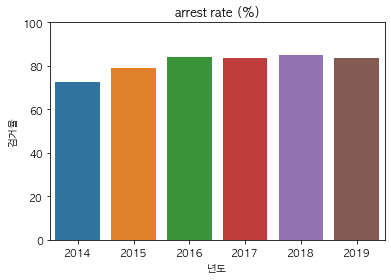

In [21]:
# 데이터 보기

print(data['검거율'])

sns.barplot(x = data['년도'], y = data['검거율'])
plt.ylim(0,100)
plt.title('arrest rate (%)')
plt.show()

## 분산도 이해 실습

### A. 범위

In [4]:
# 오름차순 정렬
tmp_data = sorted(data['검거율'])
print(f'오름차순 정렬한 값 : {tmp_data}')

# 최솟값과 최댓값 출력
print(f'최소값 : {tmp_data[0]}')
print(f'최댓값 : {tmp_data[-1]}')

오름차순 정렬한 값 : [72.8, 79.2, 83.6, 83.7, 84.2, 85.0]
최소값 : 72.8
최댓값 : 85.0


In [5]:
# max, min 매서드 활용
print(f'검거율 데이터 : {data.검거율.tolist()}')

print(f'최솟값 : {min(data.검거율)}')
print(f'최댓값 : {max(data.검거율)}')

# 따라서 범위는 최댓값 - 최솟값으로 출력할 수 있음.
print(f'검거율 데이터의 범위는 최소 {min(data.검거율)}에서 최대 {max(data.검거율)}로 {round(max(data.검거율) - min(data.검거율),2)}의 범위를 가지고 있습니다.')


검거율 데이터 : [83.7, 85.0, 83.6, 84.2, 79.2, 72.8]
최솟값 : 72.8
최댓값 : 85.0
검거율 데이터의 범위는 최소 72.8에서 최대 85.0로 12.2의 범위를 가지고 있습니다.


In [58]:
def min_max(data, columns):
    print(f'검거율 데이터 : {data[columns].tolist()}')
    print(f'최솟값 : {min(data[columns])}')
    print(f'최댓값 : {max(data[columns])}')
    print(f"'{columns}' 데이터의 범위는 최소 {min(data[columns])}에서 최대 {max(data[columns])}로 {round(max(data[columns]) - min(data[columns]),2)}의 범위를 가지고 있습니다.")

min_max(data, '검거율')


검거율 데이터 : [83.7, 85.0, 83.6, 84.2, 79.2, 72.8]
최솟값 : 72.8
최댓값 : 85.0
'검거율' 데이터의 범위는 최소 72.8에서 최대 85.0로 12.2의 범위를 가지고 있습니다.


### B. 분산

In [7]:
n = len(data)
m = data['검거율'].mean()

# 제곱을 해주는 매서드 pow를 활용하여 편차의 제곱 도출
# 편차 = 변량 - 평균
print(pow(data['검거율']-m, 2).values)
resid = pow(data['검거율']-m, 2)

# 제곱합을 한 후, 변량의 개수로 나눠주면 분산 도출
print(f'편차의 제곱합의 평균, 즉 분산은 {sum(resid)/n}입니다.')

[ 5.21361111 12.84027778  4.76694444  7.74694444  4.91361111 74.24694444]
편차의 제곱합의 평균, 즉 분산은 18.288055555555562입니다.


In [60]:
def varianve(data, columns):
    n = len(data)
    m = data[columns].mean()

    # 제곱을 해주는 매서드 pow를 활용하여 편차의 제곱 도출
    # 편차 = 변량 - 평균
    print(pow(data[columns]-m, 2).values)
    resid = pow(data[columns]-m, 2)

    # 제곱합을 한 후, 변량의 개수로 나눠주면 분산 도출
    print(f'편차의 제곱합의 평균, 즉 분산은 {sum(resid)/n}입니다.')

In [8]:
# numpy의 var 매서드를 활용한 분산 도출

np.var(data['검거율'])

18.288055555555562

### C. 표준편차

In [9]:
# 표준편차는 분산의 제곱근입니다.
print(pow(np.var(data['검거율']),1/2))

# numpy의 std 매서드를 활용한 표준편차 도출
print(np.std((data['검거율'])))

4.2764536190113835
4.2764536190113835


### D. 왜도

In [10]:
# 변수 설정
n = len(data['검거율'])
m = data['검거율'].mean()
std = np.std(data['검거율'])

# 편차/표쥰편차 값에 3제곱 시행 
tmp_result = pow((data['검거율'] - m)/std, 3)
print(f'편차/표쥰편차의 3제곱 : {tmp_result.tolist()}')

# 3제곱 한 값을 더하고 데이터 개수만큼 나누면 왜도 도출
result = sum(tmp_result)/n
print(f'왜도 : {result}')

편차/표쥰편차의 3제곱 : [0.15221471952912077, 0.5883155534071843, 0.13307878810919258, 0.2757048232048489, -0.13926753001584538, -8.180250057837027]
왜도 : -1.1950339506004208


In [11]:
# 함수화 작업
def skewness(data):
    n = len(data)
    m = data.mean()
    std = np.std(data)
    
    tmp_result = pow((data - m)/std, 3)
    result = sum(tmp_result)/n
    return result


skewness(data['검거율'])

-1.1950339506004208

In [12]:
# 라이브러리 import로 구한 skew
from scipy.stats import skew

skew(data['검거율'])

-1.195033950600421

### E. 첨도

In [13]:
# 변수 설정
n = len(data['검거율'])
m = data['검거율'].mean()
std = np.std(data['검거율'])

# 편차/표준편차의 4제곱 시행
tmp_result = pow(((data['검거율'] - m) / std), 4)
print(f'편차/표쥰편차의 4제곱 : {tmp_result.tolist()}')

# 4제곱 한 값을 더하고 데이터 개수만큼 나누고 -3을 하면 첨도 도출
result = sum(tmp_result)/n - 3
print(f'첨도 : {result}')

편차/표쥰편차의 4제곱 : [0.0812722348676314, 0.49296237510223684, 0.0679430621547515, 0.1794427095328182, 0.07218824732781522, 16.482462871807613]
첨도 : -0.10395474986785525


In [38]:
# 함수화
def kurtosis_self(data):
    n = len(data)
    m = data.mean()
    std = np.std(data)
    
    tmp_result = pow(((data - m) / std), 4)
    result = sum(tmp_result)/n - 3
    return result

kurtosis_self(data['검거율'])

-0.10395474986785525

In [39]:
# 라이브러리 import로 구한 kurtosis
from scipy.stats import kurtosis

kurtosis(data['검거율'])

-0.10395474986785525

## 참고

In [32]:
def describe_data(data, column, returns = True):
    """[summary]

    Args:
        data ([dataframe]): [데이터프레임 이름을 입력합니다]
        column ([string]): [컬럼명을 입력합니다]
        returns (bool, optional): [describe()함수를 이용한 출력 결과를 표시하는지 여부입니다.]. 기본값은 True입니다.

    Returns:
        [type]: [describe()함수를 이용한 출력 결과를 표시]
    """
    
    for i in [0,1,2,3,5,7]:
        print(f"데이터 컬럼 명 '{column}'의 {data[column].describe().index[i]}는 \
            {round(data[column].describe()[i],2)}입니다.")
        
    if returns == True:
        return data[column].describe()
    else :
        return 

# describe_data(data, '검거율')
describe_data(data, '검거율', returns = False)

데이터 컬럼 명 '검거율'의 count는             6.0입니다.
데이터 컬럼 명 '검거율'의 mean는             81.42입니다.
데이터 컬럼 명 '검거율'의 std는             4.68입니다.
데이터 컬럼 명 '검거율'의 min는             72.8입니다.
데이터 컬럼 명 '검거율'의 50%는             83.65입니다.
데이터 컬럼 명 '검거율'의 max는             85.0입니다.
